# 구글 뉴스 크롤링
## 크롤링 기본 함수
- find_element() : 설정한 특정 요소의 객체를 하나 찾아준다.
   - By.CLASS_NAME: 개발자가 설정한 class로 객체를 찾는다.
   - By.TAG_NAME: html의 tag로 객체를 찾는다.

- find_elements() : 설정한 특정 요소의 객체를 모두 찾아준다.
   - By.CLASS_NAME: 개발자가 설정한 class로 객체를 찾는다.
   - By.TAG_NAME: html의 tag로 객체를 찾는다.
   
- get_attribute() : html에서 링크를 가져올 때 사용한다.
    - href : 이미지 링크가 저장되어 있다.
    - src : 링크가 저장되어 있다.

In [144]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

In [168]:
browser = webdriver.Chrome() # 크롬 브라우저 생성

In [169]:
url = 'https://www.google.com/search?sca_esv=30c375223fbe6df1&sca_upv=1&q=%EB%8C%80%EA%B5%AC+%EB%A7%88%EB%9D%BC%ED%86%A4&tbm=nws&source=lnms&prmd=invsmbz&sa=X&ved=2ahUKEwiLsuzi9KmFAxWBh1YBHSzpAF8Q0pQJegQIDBAB&biw=1728&bih=959&dpr=2'
browser.get(url) # 원하는 웹으로 이동

In [170]:
# class 이름을 통해 객체를 가져오고 기사 제목 출력

print(browser.find_element(By.CLASS_NAME, 'n0jPhd').text)

글로벌 축제 ‘대구마라톤’… 2만8000여 명 함께 달린다


In [171]:
# 여러 개의 기사 한 번에 가져오기
# 기사의 class는 동일하다. -> 특정 클래스를 가지는 객체를 모두 찾아오면 된다.
# browser.find_elements()함수 사용
# 가져온 기사들을 for문을 사용하여 하나씩 출력

for i in browser.find_elements(By.CLASS_NAME, 'n0jPhd'):
    print(i.text)

글로벌 축제 ‘대구마라톤’… 2만8000여 명 함께 달린다
"대구마라톤 순환코스로 바뀌어 교통정체"…대구시 우회로 안내
대구마라톤의 변신…'세계 7대 대회' 노린다
7일 대구마라톤대회…도심 일대 '차 없는 날' 운영
대구 동구, 2024 대구마라톤대회 구간 도로 집중청소
2024 대구마라톤대회, 차 없는 날 '도시철도 이용하세요'
대구마라톤대회 도심 구간 교통 통제
주말 대구국제마라톤, 상금도 인원도 '역대 최대'
보스턴보다 많은 2억 걸었다…세계 최고 노리는 '대구 마라톤'
7일 대구마라톤대회...“도시철도 이용하세요”


In [172]:
# 언론사
# 내용
# 작성일

print('언론사:', browser.find_element(By.CLASS_NAME, 'MgUUmf').text)
print('내용:', browser.find_element(By.CLASS_NAME, 'GI74Re').text)
print('작성일:', browser.find_element(By.CLASS_NAME, 'OSrXXb').text) # 기본적인 방법으로 읽어지지 않는다.
# print('작성일:', browser.find_element(By.CLASS_NAME, 'OSrXXb').find_element(By.TAG_NAME, 'span').text) -> tag로 찾을 수 없다.
# 왜 그럴까? -> 'OSrXXb'가 이전에 사용된적 있다. -> class의 이름을 바꿔본다.
print('작성일:', browser.find_element(By.CLASS_NAME, 'rbYSKb').text)

언론사: 동아일보
내용: 대구시가 7일 오전 8시 수성구 대구스타디움에서 '대구마라톤대회'를 개최한다. 세계 17개국 정상급 엘리트 선수 160명을 비롯해 55개국 마라톤...
작성일: 
작성일: 1일 전


In [173]:
com_li = browser.find_elements(By.CLASS_NAME, 'n0jPhd')
content_li = browser.find_elements(By.CLASS_NAME, 'GI74Re')
date_li = browser.find_elements(By.CLASS_NAME, 'rbYSKb')

for i in range(len(com_li)):
    print(com_li[i].text)
    print(content_li[i].text)
    print(date_li[i].text, end='\n\n')

글로벌 축제 ‘대구마라톤’… 2만8000여 명 함께 달린다
대구시가 7일 오전 8시 수성구 대구스타디움에서 '대구마라톤대회'를 개최한다. 세계 17개국 정상급 엘리트 선수 160명을 비롯해 55개국 마라톤...
1일 전

"대구마라톤 순환코스로 바뀌어 교통정체"…대구시 우회로 안내
(대구=연합뉴스) 류성무 기자 = 대구시는 오는 7일 대구마라톤대회 개최로 인해 대구스타디움 일원과 수성구, 중구, 동구 등 도심 일대 교통이 ...
2일 전

대구마라톤의 변신…'세계 7대 대회' 노린다
대구마라톤의 변신…세계 7대 대회 노린다, 올 우승상금 16만弗 세계 최고 정상급 선수 160명…7일 개최.
1일 전

7일 대구마라톤대회…도심 일대 '차 없는 날' 운영
7일 열리는 '2024 대구마라톤대회' 당일 도심 일대 도로가 통제된다. 대구시는 3일 “대구마라톤대회는 대구시 전역을 한 바퀴 도는 순환코스로 변경돼...
2일 전

대구 동구, 2024 대구마라톤대회 구간 도로 집중청소
대구=에너지경제신문 손중모기자 대구 동구청은 7일에 열리는 `2024 대구마라톤대회` 지원을 위해 진공노면청소를 동원해 선수들이 뛰는 도로 구간을...
24시간 전

2024 대구마라톤대회, 차 없는 날 '도시철도 이용하세요'
다가오는 4월 7일(일) 2024 대구마라톤대회 개최로 인해 대구스타디움 일원과 수성구, 중구, 동구 등 도심 일대 교통이 통제된다.
2일 전

대구마라톤대회 도심 구간 교통 통제
대구마라톤대회가 열리는 오는 7일, 일요일 오전에 수성구 대구스타디움과 중구, 동구 등 도심 일부 구간의...
1일 전

주말 대구국제마라톤, 상금도 인원도 '역대 최대'
7일 대구시내 일원에서 열리는 '2024 대구국제마라톤대회'에서는 어떤 기록이 나올까.국내 유일의 골드라벨 대회인 대구국제마라톤대회는 올해부터...
16시간 전

보스턴보다 많은 2억 걸었다…세계 최고 노리는 '대구 마라톤'
대구시는 이번 대회 우승 상금을 전 세계 최고 수준으로 올려, 세계 6대 마라톤 대회와 어깨를 견줄만

In [174]:
# 첫 기사로 이동 -> 클릭을 사용하여 해당 기사로 이동
browser.find_element(By.CLASS_NAME, 'n0jPhd').click()

In [76]:
# 기사 내용 확인
browser.find_element(By.CLASS_NAME, 'news_view').text

'7일 오전 8시 대구스타디움서 개최\n세계 정상급 선수 160명 참가… 상금 2억1500만 원 최고 수준\n도심 전역 달리도록 코스 재설계\n오전 5시부터 구간별 교통 통제\n지난해 4월 열린 대구마라톤대회에 참가한 시민들이 도심을 달리고 있다. 대구시 제공\n대구시가 7일 오전 8시 수성구 대구스타디움에서 ‘대구마라톤대회’를 개최한다.\n\n세계 17개국 정상급 엘리트 선수 160명을 비롯해 55개국 마라톤 동호인 2만8000여 명이 참가해 역대 최대 규모로 열린다. 지난해에 이어 올해도 세계육상연맹(WA)의 골드라벨 인증을 획득했다.\n\n시는 올해부터 보스턴 런던 뉴욕 베를린 시카고 도쿄 등 세계 6대 마라톤대회와 어깨를 견줄 최고 권위의 대회로 만든다는 목표를 세웠다. 먼저 대회 우승 상금을 4만 달러(약 5400만 원)에서 16만 달러(약 2억1500만 원)로 대폭 인상했다. 2시간 4, 5분대의 세계적인 선수 9명을 비롯해 해외 선수 67명, 국내 선수 93명이 출전해 세계 최고 수준의 우승 상금을 놓고 각축을 벌인다. 이와 함께 남녀 세계신기록은 10만 달러(약 1억3500만 원), 대회신기록은 1만 달러(약 1350만 원)를 준다.\n\n해외 선수 가운데 튀르키예 출신의 칸 키겐 오즈빌렌(2시간 4분 16초)과 케냐 출신의 새미 키트와라(2시간 4분 28초)가 대회신기록 경신에 도전한다. 국내 선수는 한국전력의 김건오(2시간 14분 8초), 삼성전자의 김도연(여·2시간 25분 41초) 등이 출전한다. 이번 대회는 올해 7월 프랑스 파리에서 열리는 올림픽 국가대표 선발전을 병행한다.\n\n\n대회 집결지와 코스도 크게 바뀌었다. 출발지는 기존 중구 국채보상운동기념공원에서 대구 육상의 메카인 대구스타디움으로 옮겼다. 지난해까지 같은 코스를 세 바퀴 도는 루프 코스를 대구 도심 전역을 한 바퀴 도는 순환 코스로 재설계했다. 권두성 대구시 체육진흥과장은 “대구의 주요 명소와 시설 등을 국내뿐만 아니라 해외에 널리 알리는 기회가 될 것”이라며 “도시 브

In [81]:
# 기사내용을 깔끔하게 출력
# 기사내용을 가져와서 '\n'을 기준으로 분할하여 리스트로 저장
# 각 내용을 출력

content = list(browser.find_element(By.CLASS_NAME, 'news_view').text.split('\n'))

for text in content:
    print(text)

7일 오전 8시 대구스타디움서 개최
세계 정상급 선수 160명 참가… 상금 2억1500만 원 최고 수준
도심 전역 달리도록 코스 재설계
오전 5시부터 구간별 교통 통제
지난해 4월 열린 대구마라톤대회에 참가한 시민들이 도심을 달리고 있다. 대구시 제공
대구시가 7일 오전 8시 수성구 대구스타디움에서 ‘대구마라톤대회’를 개최한다.

세계 17개국 정상급 엘리트 선수 160명을 비롯해 55개국 마라톤 동호인 2만8000여 명이 참가해 역대 최대 규모로 열린다. 지난해에 이어 올해도 세계육상연맹(WA)의 골드라벨 인증을 획득했다.

시는 올해부터 보스턴 런던 뉴욕 베를린 시카고 도쿄 등 세계 6대 마라톤대회와 어깨를 견줄 최고 권위의 대회로 만든다는 목표를 세웠다. 먼저 대회 우승 상금을 4만 달러(약 5400만 원)에서 16만 달러(약 2억1500만 원)로 대폭 인상했다. 2시간 4, 5분대의 세계적인 선수 9명을 비롯해 해외 선수 67명, 국내 선수 93명이 출전해 세계 최고 수준의 우승 상금을 놓고 각축을 벌인다. 이와 함께 남녀 세계신기록은 10만 달러(약 1억3500만 원), 대회신기록은 1만 달러(약 1350만 원)를 준다.

해외 선수 가운데 튀르키예 출신의 칸 키겐 오즈빌렌(2시간 4분 16초)과 케냐 출신의 새미 키트와라(2시간 4분 28초)가 대회신기록 경신에 도전한다. 국내 선수는 한국전력의 김건오(2시간 14분 8초), 삼성전자의 김도연(여·2시간 25분 41초) 등이 출전한다. 이번 대회는 올해 7월 프랑스 파리에서 열리는 올림픽 국가대표 선발전을 병행한다.


대회 집결지와 코스도 크게 바뀌었다. 출발지는 기존 중구 국채보상운동기념공원에서 대구 육상의 메카인 대구스타디움으로 옮겼다. 지난해까지 같은 코스를 세 바퀴 도는 루프 코스를 대구 도심 전역을 한 바퀴 도는 순환 코스로 재설계했다. 권두성 대구시 체육진흥과장은 “대구의 주요 명소와 시설 등을 국내뿐만 아니라 해외에 널리 알리는 기회가 될 것”이라며 “도시 브랜드 가치를 높이는 대회가 

In [89]:
# 링크
# html: 링크데이터는 <a href='~~'/> 형태로 저장되어 있다.

browser.find_element(By.CLASS_NAME, 'WlydOe').get_attribute('href')

'https://www.donga.com/news/Society/article/all/20240403/124307452/1'

In [96]:
# 모든 링크 수집
# 'WlydOe'를 모두 수집하고 각각의 객체에서 링크들을 수집한다.

li = []
for i in browser.find_elements(By.CLASS_NAME, 'WlydOe'):
    li.append(i.get_attribute('href'))
    
for link in li:
    print(link)

https://www.donga.com/news/Society/article/all/20240403/124307452/1
https://www.yna.co.kr/view/AKR20240403065900053
https://www.hankyung.com/article/2024040378391
https://m.ekn.kr/view.php?key=20240404027569626
https://www.yna.co.kr/view/RPR20240403002100353
https://news.kbs.co.kr/news/view.do?ncd=7931359
https://www.idaegu.co.kr/news/articleView.html?idxno=456176
https://www.joongang.co.kr/article/25239148
https://news.bbsi.co.kr/news/articleView.html?idxno=3150926
https://www.kspnews.com/1699901


In [98]:
com_li = browser.find_elements(By.CLASS_NAME, 'n0jPhd')
content_li = browser.find_elements(By.CLASS_NAME, 'GI74Re')
date_li = browser.find_elements(By.CLASS_NAME, 'rbYSKb')

for i in range(len(com_li)):
    print(com_li[i].text)
    print(content_li[i].text)
    print(date_li[i].text)
    print(li[i], end='\n\n')

글로벌 축제 ‘대구마라톤’… 2만8000여 명 함께 달린다
대구시가 7일 오전 8시 수성구 대구스타디움에서 '대구마라톤대회'를 개최한다. 세계 17개국 정상급 엘리트 선수 160명을 비롯해 55개국 마라톤...
1일 전
https://www.donga.com/news/Society/article/all/20240403/124307452/1

"대구마라톤 순환코스로 바뀌어 교통정체"…대구시 우회로 안내
(대구=연합뉴스) 류성무 기자 = 대구시는 오는 7일 대구마라톤대회 개최로 인해 대구스타디움 일원과 수성구, 중구, 동구 등 도심 일대 교통이 ...
2일 전
https://www.yna.co.kr/view/AKR20240403065900053

대구마라톤의 변신…'세계 7대 대회' 노린다
대구마라톤의 변신…세계 7대 대회 노린다, 올 우승상금 16만弗 세계 최고 정상급 선수 160명…7일 개최.
1일 전
https://www.hankyung.com/article/2024040378391

대구 동구, 2024 대구마라톤대회 구간 도로 집중청소
대구=에너지경제신문 손중모기자 대구 동구청은 7일에 열리는 `2024 대구마라톤대회` 지원을 위해 진공노면청소를 동원해 선수들이 뛰는 도로 구간을...
21시간 전
https://m.ekn.kr/view.php?key=20240404027569626

2024 대구마라톤대회, 차 없는 날 '도시철도 이용하세요'
다가오는 4월 7일(일) 2024 대구마라톤대회 개최로 인해 대구스타디움 일원과 수성구, 중구, 동구 등 도심 일대 교통이 통제된다.
1일 전
https://www.yna.co.kr/view/RPR20240403002100353

대구마라톤대회 도심 구간 교통 통제
대구마라톤대회가 열리는 오는 7일, 일요일 오전에 수성구 대구스타디움과 중구, 동구 등 도심 일부 구간의...
1일 전
https://news.kbs.co.kr/news/view.do?ncd=7931359

주말 대구국제마라톤, 상금도 인원도 '역대 최대



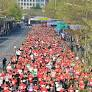

In [108]:
# 이미지 링크 수집
parent = browser.find_element(By.CLASS_NAME, 'uhHOwf')
img_link = parent.find_element(By.TAG_NAME, 'img').get_attribute('src')
print(img_link)

img_browser = webdriver.Chrome() # 새로운 창 생성
img_browser.get(img_link) # 이미지 링크로 이동

In [142]:
data_list = []
container_list = browser.find_elements(By.CLASS_NAME, 'lSfe4c')

for elem in container_list:
    title = elem.find_element(By.CLASS_NAME, 'n0jPhd').text
    company = elem.find_element(By.CLASS_NAME, 'MgUUmf').text
    content = elem.find_element(By.CLASS_NAME, 'GI74Re').text
    created_at = elem.find_element(By.CLASS_NAME, 'rbYSKb').text
    img_link = elem.find_element(By.TAG_NAME, 'img').get_attribute('src')

    data_list.append({
        '제목': title,
        '언론사': company,
        '내용': content,
        '작성시간': created_at,
        '이미지 링크': img_link
    })
    
df = pd.DataFrame(data_list)
df

,제목,언론사,내용,작성시간,이미지 링크
0,글로벌 축제 ‘대구마라톤’… 2만8000여 명 함께 달린다,동아일보,대구시가 7일 오전 8시 수성구 대구스타디움에서 '대구마라톤대회'를 개최한다. 세계...,1일 전,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"""대구마라톤 순환코스로 바뀌어 교통정체""…대구시 우회로 안내",연합뉴스,(대구=연합뉴스) 류성무 기자 = 대구시는 오는 7일 대구마라톤대회 개최로 인해 대...,2일 전,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,대구마라톤의 변신…'세계 7대 대회' 노린다,한국경제,"대구마라톤의 변신…세계 7대 대회 노린다, 올 우승상금 16만弗 세계 최고 정상급 ...",1일 전,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
3,"대구 동구, 2024 대구마라톤대회 구간 도로 집중청소",에너지경제신문,대구=에너지경제신문 손중모기자 대구 동구청은 7일에 열리는 `2024 대구마라톤대회...,21시간 전,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"2024 대구마라톤대회, 차 없는 날 '도시철도 이용하세요'",연합뉴스,다가오는 4월 7일(일) 2024 대구마라톤대회 개최로 인해 대구스타디움 일원과 수...,1일 전,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,대구마라톤대회 도심 구간 교통 통제,KBS 뉴스,"대구마라톤대회가 열리는 오는 7일, 일요일 오전에 수성구 대구스타디움과 중구, 동구...",1일 전,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"주말 대구국제마라톤, 상금도 인원도 '역대 최대'",대구신문,7일 대구시내 일원에서 열리는 '2024 대구국제마라톤대회'에서는 어떤 기록이 나올...,13시간 전,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,보스턴보다 많은 2억 걸었다…세계 최고 노리는 '대구 마라톤',중앙일보,"대구시는 이번 대회 우승 상금을 전 세계 최고 수준으로 올려, 세계 6대 마라톤 대...",5일 전,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,7일 대구마라톤대회...“도시철도 이용하세요”,BBS불교방송,"일요일인 오는 7일 2024 대구마라톤대회 개최로 인해 대구스타디움 일원과 수성구,...",2일 전,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"[케이에스피뉴스] 대구 동구, 2024 대구마라톤대회 구간 도로 집중청소",케이에스피뉴스,케이에스피뉴스=김정훈 기자 kspa@kspnews.com] 대구 동구청은 7일에 열...,21시간 전,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


In [143]:
df.to_csv('google_news.csv', encoding='utf-8-sig')

# yes24 베스트셀러 추출 및 엑셀에 저장

In [145]:
yes_24 = webdriver.Chrome()
url = 'https://www.yes24.com'
yes_24.get(url)

In [151]:
container = yes_24.find_element(By.CLASS_NAME, 'yBestOl')
container

<selenium.webdriver.remote.webelement.WebElement (session="248fe476501169d3685472b633fdd5ff", element="f.3267E28783D8BFE290437F43AFFD1736.d.7E788BA707526A254137246B9569FA25.e.92")>

In [153]:
container_list = container.find_elements(By.CLASS_NAME, 'tp02')
container_list

[<selenium.webdriver.remote.webelement.WebElement (session="248fe476501169d3685472b633fdd5ff", element="f.3267E28783D8BFE290437F43AFFD1736.d.7E788BA707526A254137246B9569FA25.e.93")>,
 <selenium.webdriver.remote.webelement.WebElement (session="248fe476501169d3685472b633fdd5ff", element="f.3267E28783D8BFE290437F43AFFD1736.d.7E788BA707526A254137246B9569FA25.e.98")>,
 <selenium.webdriver.remote.webelement.WebElement (session="248fe476501169d3685472b633fdd5ff", element="f.3267E28783D8BFE290437F43AFFD1736.d.7E788BA707526A254137246B9569FA25.e.103")>,
 <selenium.webdriver.remote.webelement.WebElement (session="248fe476501169d3685472b633fdd5ff", element="f.3267E28783D8BFE290437F43AFFD1736.d.7E788BA707526A254137246B9569FA25.e.5893")>,
 <selenium.webdriver.remote.webelement.WebElement (session="248fe476501169d3685472b633fdd5ff", element="f.3267E28783D8BFE290437F43AFFD1736.d.7E788BA707526A254137246B9569FA25.e.5894")>]

In [164]:
best_seller_li = []

for elem in container_list:
    title = elem.find_element(By.CLASS_NAME, 'rnk_info').find_element(By.TAG_NAME, 'strong').text
    author = elem.find_element(By.CLASS_NAME, 'rnk_info').find_element(By.TAG_NAME, 'em').text
    img_link = elem.find_element(By.TAG_NAME, 'img').get_attribute('src')
    product_link = elem.find_element(By.CLASS_NAME, 'rnk_lnk').get_attribute('href')
    
    best_seller_li.append({
        '제목': title,
        '저자': author,
        '책 이미지': img_link,
        '상품 링크': product_link
    })
    
best_seller_li

[{'제목': '불변의 법칙',
  '저자': '모건 하우절 저/이수경 역',
  '책 이미지': 'https://image.yes24.com/Goods/124999476/S',
  '상품 링크': 'https://www.yes24.com/Product/Goods/124999476'},
 {'제목': '패밀리 레스토랑 가자. 上',
  '저자': '와야마 야마 글,그림/현승희 역',
  '책 이미지': 'https://image.yes24.com/Goods/125692983/S',
  '상품 링크': 'https://www.yes24.com/Product/Goods/125692983'},
 {'제목': '일류의 조건',
  '저자': '사이토 다카시 저/정현 역',
  '책 이미지': 'https://image.yes24.com/Goods/125491624/S',
  '상품 링크': 'https://www.yes24.com/Product/Goods/125491624'},
 {'제목': '나를 소모하지 않는 현명한 태도에 관하여',
  '저자': '마티아스 뇔케 저/이미옥 역',
  '책 이미지': 'https://image.yes24.com/Goods/125295101/S',
  '상품 링크': 'https://www.yes24.com/Product/Goods/125295101'},
 {'제목': '삼체 1~3 세트',
  '저자': '류츠신 저/이현아,허유영 공역',
  '책 이미지': 'https://image.yes24.com/Goods/90926731/S',
  '상품 링크': 'https://www.yes24.com/Product/Goods/90926731'}]

In [166]:
df = pd.DataFrame(best_seller_li)
df

,제목,저자,책 이미지,상품 링크
0,불변의 법칙,모건 하우절 저/이수경 역,https://image.yes24.com/Goods/124999476/S,https://www.yes24.com/Product/Goods/124999476
1,패밀리 레스토랑 가자. 上,"와야마 야마 글,그림/현승희 역",https://image.yes24.com/Goods/125692983/S,https://www.yes24.com/Product/Goods/125692983
2,일류의 조건,사이토 다카시 저/정현 역,https://image.yes24.com/Goods/125491624/S,https://www.yes24.com/Product/Goods/125491624
3,나를 소모하지 않는 현명한 태도에 관하여,마티아스 뇔케 저/이미옥 역,https://image.yes24.com/Goods/125295101/S,https://www.yes24.com/Product/Goods/125295101
4,삼체 1~3 세트,"류츠신 저/이현아,허유영 공역",https://image.yes24.com/Goods/90926731/S,https://www.yes24.com/Product/Goods/90926731


In [167]:
df.to_csv('yes_24_bestseller.csv', encoding='utf-8-sig')

### 책제목, 저자, 출간일, 가격, 판매지수 크롤링

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

In [3]:
url = 'https://www.yes24.com'
browser = webdriver.Chrome()
browser.get(url)

In [4]:
browser.find_element(By.CLASS_NAME, 'yesCornerServ').find_element(By.TAG_NAME, 'a').click()

In [5]:
best_seller_books = []
page = browser.find_elements(By.CLASS_NAME, 'itemUnit')
print(len(page))

24


In [6]:
for elem in page:
    title = elem.find_element(By.CLASS_NAME, 'gd_name').text
    author = elem.find_element(By.CLASS_NAME, 'info_auth').text
    pub_date = elem.find_element(By.CLASS_NAME, 'info_date').text
    price = elem.find_element(By.CLASS_NAME, 'txt_num').text
    saleNum = elem.find_element(By.CLASS_NAME, 'saleNum').text
    
    best_seller_books.append({
        '제목': title,
        '저자': author,
        '출간일': pub_date,
        '가격': price,
        '판매지수': saleNum
    })
    
df = pd.DataFrame(best_seller_books)

In [7]:
df

,제목,저자,출간일,가격,판매지수
0,불변의 법칙,모건 하우절 저/이수경 역,2024년 02월,"22,500원","판매지수 424,284"
1,패밀리 레스토랑 가자. 上,와야마 야마 글그림/현승희 역,2024년 04월,"7,650원","판매지수 134,376"
2,일류의 조건,사이토 다카시 저/정현 역,2024년 03월,"17,820원","판매지수 161,994"
3,나를 소모하지 않는 현명한 태도에 관하여,마티아스 뇔케 저/이미옥 역,2024년 03월,"16,020원","판매지수 167,601"
4,삼체 1~3 세트,"류츠신 저/이현아, 허유영 역",2020년 07월,"60,300원","판매지수 118,308"
5,나는 메트로폴리탄 미술관의 경비원입니다,"패트릭 브링리 저/김희정, 조현주 역",2023년 11월,"15,750원","판매지수 411,657"
6,알사탕 제조법,백희나 저,2024년 03월,"9,000원","판매지수 129,576"
7,마흔에 읽는 쇼펜하우어,강용수 저,2023년 09월,"15,300원","판매지수 859,296"
8,세이노의 가르침,세이노(SayNo) 저,2023년 03월,"6,480원","판매지수 1,811,112"
9,이처럼 사소한 것들,클레어 키건 저/홍한별 역,2023년 11월,"12,420원","판매지수 308,556"


In [13]:
browser = webdriver.Chrome()
url = 'https://www.yes24.com/Product/Category/BestSeller?categoryNumber=001&pageNumber='

re = []

for i in range(1, 3):
    url_tmp = url + str(i) + '&pageSize=24'
    browser.get(url_tmp)
    
    page = browser.find_elements(By.CLASS_NAME, 'itemUnit')
    
    books = []
    
    for elem in page:
        title = elem.find_element(By.CLASS_NAME, 'gd_name').text
        author = elem.find_element(By.CLASS_NAME, 'info_auth').text
        pub_date = elem.find_element(By.CLASS_NAME, 'info_date').text
        price = elem.find_element(By.CLASS_NAME, 'txt_num').text
        saleNum = elem.find_element(By.CLASS_NAME, 'saleNum').text
    
        books.append({
            '제목': title,
            '저자': author,
            '출간일': pub_date,
            '가격': price,
            '판매지수': saleNum
        })
        
    re.append(books)

print(re)

[[{'제목': '불변의 법칙', '저자': '모건 하우절 저/이수경 역', '출간일': '2024년 02월', '가격': '22,500원', '판매지수': '판매지수 424,284'}, {'제목': '패밀리 레스토랑 가자. 上', '저자': '와야마 야마 글그림/현승희 역', '출간일': '2024년 04월', '가격': '7,650원', '판매지수': '판매지수 134,376'}, {'제목': '일류의 조건', '저자': '사이토 다카시 저/정현 역', '출간일': '2024년 03월', '가격': '17,820원', '판매지수': '판매지수 161,994'}, {'제목': '나를 소모하지 않는 현명한 태도에 관하여', '저자': '마티아스 뇔케 저/이미옥 역', '출간일': '2024년 03월', '가격': '16,020원', '판매지수': '판매지수 167,601'}, {'제목': '삼체 1~3 세트', '저자': '류츠신 저/이현아, 허유영 역', '출간일': '2020년 07월', '가격': '60,300원', '판매지수': '판매지수 118,308'}, {'제목': '나는 메트로폴리탄 미술관의 경비원입니다', '저자': '패트릭 브링리 저/김희정, 조현주 역', '출간일': '2023년 11월', '가격': '15,750원', '판매지수': '판매지수 411,657'}, {'제목': '알사탕 제조법', '저자': '백희나 저', '출간일': '2024년 03월', '가격': '9,000원', '판매지수': '판매지수 129,576'}, {'제목': '마흔에 읽는 쇼펜하우어', '저자': '강용수 저', '출간일': '2023년 09월', '가격': '15,300원', '판매지수': '판매지수 859,296'}, {'제목': '세이노의 가르침', '저자': '세이노(SayNo) 저', '출간일': '2023년 03월', '가격': '6,480원', '판매지수': '판매지수 1,811,112'}, {'제목': '이처럼 사소한 것들', '저자': '클레

In [14]:
len(re)

2

In [15]:
df = pd.DataFrame(re)
df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,"{'제목': '불변의 법칙', '저자': '모건 하우절 저/이수경 역', '출간일'...","{'제목': '패밀리 레스토랑 가자. 上', '저자': '와야마 야마 글그림/현승희...","{'제목': '일류의 조건', '저자': '사이토 다카시 저/정현 역', '출간일'...","{'제목': '나를 소모하지 않는 현명한 태도에 관하여', '저자': '마티아스 뇔...","{'제목': '삼체 1~3 세트', '저자': '류츠신 저/이현아, 허유영 역', ...","{'제목': '나는 메트로폴리탄 미술관의 경비원입니다', '저자': '패트릭 브링리...","{'제목': '알사탕 제조법', '저자': '백희나 저', '출간일': '2024년...","{'제목': '마흔에 읽는 쇼펜하우어', '저자': '강용수 저', '출간일': '...","{'제목': '세이노의 가르침', '저자': '세이노(SayNo) 저', '출간일'...","{'제목': '이처럼 사소한 것들', '저자': '클레어 키건 저/홍한별 역', '...",...,"{'제목': '공부가 설렘이 되는 순간', '저자': '조승우 저', '출간일': ...","{'제목': '비트코인 폭발적 상승에 올라타라', '저자': '강환국 저', '출간...","{'제목': '돈의 심리학 (30만 부 기념 스페셜 에디션)', '저자': '모건 ...","{'제목': '꽃길이 따로 있나, 내 삶이 꽃인 것을', '저자': '오평선 저',...","{'제목': '깨진 틈이 있어야 그 사이로 빛이 들어온다', '저자': '프리드리히...","{'제목': '열혈강호 90', '저자': '전극진 글/양재현 그림', '출간일':...","{'제목': '기적의 서울대 쌍둥이 공부법', '저자': '여호원, 여호용 저', ...","{'제목': '요즘 역사 : 근대', '저자': '황현필 저', '출간일': '20...","{'제목': '이은경쌤의 초등어휘일력 365', '저자': '이은경 저', '출간일...","{'제목': '똑 부러지게 내 생각을 전하는 말하기 연습', '저자': '임정민 글..."


In [16]:
df.to_csv('best_seller.csv', encoding='utf-8-sig')

In [ ]:
browser.find_elements(By., 'itemUnit')

In [ ]:
# 페이지 이동 -> xpath사용
# 2페이지 : //*[@id="bestContentsWrap"]/div[6]/div/div/div/a[1]
# 3페이지 : //*[@id="bestContentsWrap"]/div[6]/div/div/div/a[2]
# 4페이지 : //*[@id="bestContentsWrap"]/div[6]/div/div/div/a[3]

In [41]:
import time

browser = webdriver.Chrome()
browser.get('https://www.yes24.com/Product/Category/BestSeller?categoryNumber=001&pageNumber=1&pageSize=24')

for i in range(2, 4):
    xpath = f'//*[@id="bestContentsWrap"]/div[6]/div/div/div/a[{i}]'
    print(xpath)
    
    browser.find_element(By.XPATH, xpath).click() # xpath를 써서 페이지 버튼을 찾고 클릭
    time.sleep(3) # time.sleep()이 없으면 페이지가 완전히 생성되기 전에 페이지 이동이 실행되기에 error가 발생한다.

//*[@id="bestContentsWrap"]/div[6]/div/div/div/a[2]
good
//*[@id="bestContentsWrap"]/div[6]/div/div/div/a[3]
good


In [48]:
import time

browser = webdriver.Chrome()
browser.get('https://www.yes24.com/Product/Category/BestSeller?categoryNumber=001&pageNumber=1&pageSize=24')

re = []

for i in range(1, 4):
    xpath = f'//*[@id="bestContentsWrap"]/div[6]/div/div/div/a[{i}]'
    print(xpath)
    
    browser.find_element(By.XPATH, xpath).click() # xpath를 써서 페이지 버튼을 찾고 클릭
    time.sleep(3) # time.sleep()이 없으면 페이지가 완전히 생성되기 전에 페이지 이동이 실행되기에 error가 발생한다.
    
    page = browser.find_elements(By.CLASS_NAME, 'itemUnit')
    books = []
    
    for elem in page:
        title = elem.find_element(By.CLASS_NAME, 'gd_name').text
        author = elem.find_element(By.CLASS_NAME, 'info_auth').text
        pub_date = elem.find_element(By.CLASS_NAME, 'info_date').text
        price = elem.find_element(By.CLASS_NAME, 'txt_num').text
        saleNum = elem.find_element(By.CLASS_NAME, 'saleNum').text
    
        books.append({
            '제목': title,
            '저자': author,
            '출간일': pub_date,
            '가격': price,
            '판매지수': saleNum
        })
        
    re.append(books)

df = pd.DataFrame(re)
print(df[0][0])
print(df[1][0])
print(df[2][0])

//*[@id="bestContentsWrap"]/div[6]/div/div/div/a[1]
25
1
미리보기
[도서] 2024 큰별쌤 최태성의 별별한국사 한국사능력검정시험 심화(1,2,3급) 상 2024 큰별쌤 최태성의 별별한국사 한국사능력검정시험 심화(1,2,3급) 상 새창이동
최태성 저 이투스북 2023년 12월
10%
14,400원
포인트적립800원
판매지수 231,933 회원리뷰(49건) 리뷰 총점9.8 정보 더 보기/감추기
22시까지 주문하면 내일 아침 7시 전(4/6, 토) 도착예정
분철서비스 이용이 가능한 도서입니다. 자세히 보기
#한능검
#한국사대표강사
#모두의별별한국사
#분철
이벤트 선착순 사은품 2024 한국사능력검정시험 시험일정 (23.12.04 ~ 24.12.31)
수량감소
수량증가
카트에 넣기
바로구매
리스트에 넣기
//*[@id="bestContentsWrap"]/div[6]/div/div/div/a[2]
49
6
미리보기
[도서] 고층 입원실의 갱스터 할머니 남몰래 난치병 10년 차, 빵먹다살찐떡이 온몸으로 아프고 온몸으로 사랑한 날들 [ 초판 한정 빵떡 사인 인쇄본 ] 고층 입원실의 갱스터 할머니 새창이동
양유진 저 21세기북스 2024년 03월
구매혜택 포함 국내도서 3만원↑ 책거리 팔곡병풍 책갈피 증정(포인트 차감)
10%
16,920원
포인트적립940원
판매지수 198,378 회원리뷰(18건) 리뷰 총점9.2 정보 더 보기/감추기
22시까지 주문하면 내일 아침 7시 전(4/6, 토) 도착예정
#유튜버의책
#얼리리더
#투병기
이벤트 사은품 얼리리더를 위한 4월의 책 : 책거리 팔곡병풍 책갈피 증정 (24.04.01 ~ 24.04.30)
수량감소
수량증가
카트에 넣기
바로구매
리스트에 넣기
//*[@id="bestContentsWrap"]/div[6]/div/div/div/a[3]
73
1
미리보기
오늘의책 2020 올해의 책
[도서] 돈의 속성 300쇄 리커버 [ 양장 ] 돈의 속성 300쇄 리커버 새창이동
김승호 저 스노우폭

In [ ]:
import time

browser = webdriver.Chrome()
browser.get('https://www.yes24.com/Product/Category/BestSeller?categoryNumber=001&pageNumber=1&pageSize=24')

re = []

for i in range(1, 4):
    xpath = f'//*[@id="bestContentsWrap"]/div[6]/div/div/div/a[{i}]'
    print(xpath)
    
    browser.find_element(By.XPATH, xpath).click() # xpath를 써서 페이지 버튼을 찾고 클릭
    time.sleep(3) # time.sleep()이 없으면 페이지가 완전히 생성되기 전에 페이지 이동이 실행되기에 error가 발생한다.
    
    page = browser.find_elements(By.CLASS_NAME, 'itemUnit')
    books = []
    
    for elem in page:
        title = elem.find_element(By.CLASS_NAME, 'gd_name').text
        author = elem.find_element(By.CLASS_NAME, 'info_auth').text
        pub_date = elem.find_element(By.CLASS_NAME, 'info_date').text
        price = elem.find_element(By.CLASS_NAME, 'txt_num').text
        saleNum = elem.find_element(By.CLASS_NAME, 'saleNum').text
    
        books.append({
            '제목': title,
            '저자': author,
            '출간일': pub_date,
            '가격': price,
            '판매지수': saleNum
        })
        
    re.append(books)

df = pd.DataFrame(re)
print(df[0][0])
print(df[1][0])
print(df[2][0])